In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
% matpllotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# Read dataset
data = pd.read_csv('Admission_Prediction.csv')
data.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72


In [3]:
data.shape

(500, 9)

In [11]:
data['CGPA'].min(), data['CGPA'].max()

(6.8, 9.92)

In [4]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [7]:
data.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

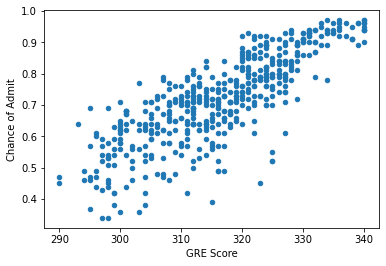

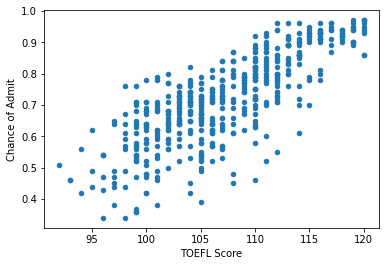

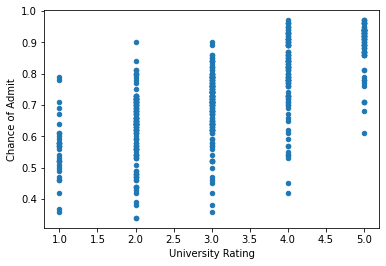

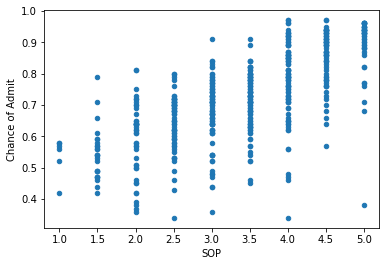

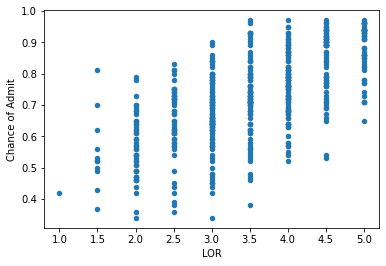

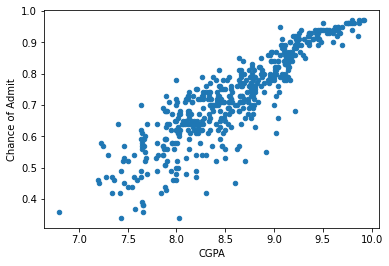

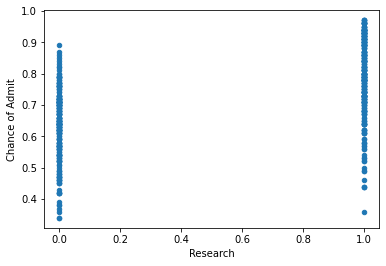

In [12]:
for col in data.columns:
    if col not in ['Serial No.','Chance of Admit']:
        data.plot(kind = 'scatter', x= col, y = 'Chance of Admit')

In [15]:
# Missing Value Treatment
data['GRE Score'].fillna(data['GRE Score'].mode()[0], inplace =  True)
data['TOEFL Score'].fillna(data['TOEFL Score'].mode()[0], inplace =  True)
data['University Rating'].fillna(data['University Rating'].mode()[0], inplace =  True)

In [20]:
# Splitting Data into Train and test
from sklearn.model_selection import train_test_split

X = data.drop(['Serial No.','Chance of Admit'], axis = 1)
Y = data['Chance of Admit']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state=6)

In [24]:
# shape of trian and test dataset
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((350, 7), (150, 7), (350,), (150,))

In [26]:
# Fitting model in Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# Predict Target value
y_pred = lr.predict(x_test)

In [36]:
# Calculating Model Performance (R2)
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.843564879133262

In [34]:
# Save Model
filename = 'linear_model.pickle'
pickle.dump(lr, open(filename, 'wb'))

In [35]:
# prediction using the saved model.
loaded_model = pickle.load(open(filename, 'rb'))
prediction=loaded_model.predict(([[320,120,5,5,5,10,1]]))
print(prediction[0])

0.9915264207865322
